            Restaurants  Precio minimo  \
3              El_Sauce            920   
6  Ranchon_El_PinareÃ±o           1030   
0          Abuela_D'Oro           1450   
9             The_Place           1500   
8              Tanokura           1855   
5              Nameless           2300   
1       Altahabana_Club           2400   
2            Cafe_Tilin           2850   
7     Ranchon_Las_Vegas           2850   
4              Entabla2           2900   

                                            Opciones  
3  [Bocadito de Jamon, Pizza Napolitana, Refresco...  
6  [Tostones Chatino, Ropa Vieja de Carnero, Agua...  
0      [Papas Doradas, Pizza Napolitana, None, None]  
9   [Tostones, Pizza Napolitana, Pomo de Agua, None]  
8  [Mariquitas de Platano, Arroz Fritos, Agua Nat...  
5          [Picadera Mixta, Arroz Frito, None, None]  
1  [Frituras de Malanga, Pollo Asado, Agua Natura...  
2  [Crema de Malanga, Pollo Frito, Agua Natural N...  
7  [Brusquetas de Serrano y Queso, Pollo G

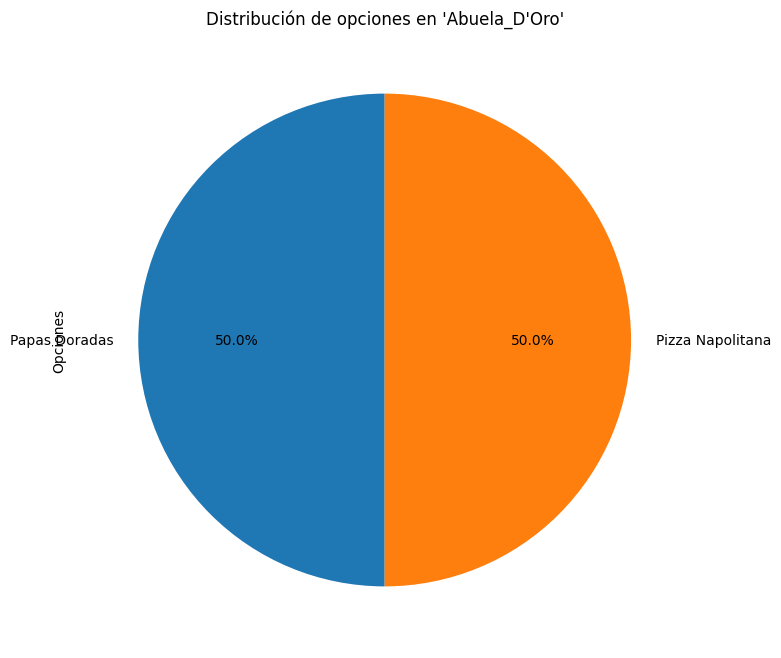

In [ ]:
from Proyecto import precios,minimo,pastel,total
import pandas as pd
import matplotlib.pyplot as plt

municipio=input("nombre del Municipio: ")
df_completo,restaurantes  =  precios('./Proyecto-ICD/'+ municipio)
df_minimo=df_completo.applymap(minimo)
Precio = df_minimo.apply(lambda row: row.apply(lambda x: x[0] if x is not None else 0).sum(), axis=1)
cantidad = df_minimo.apply(lambda row: row.apply(lambda x: x[1] if isinstance(x,list) and x[1] is not None else None).tolist(), axis=1)

nuevo_df = pd.DataFrame({ "Restaurants": restaurantes, "Precio minimo": Precio, "Opciones":cantidad })

nuevo_df1 = nuevo_df.sort_values(by="Precio minimo")
money_you_have=input("Escribe el presupuesto para una persona que posees: ")
Restaurante_Disponibles=nuevo_df1[nuevo_df1["Precio minimo"]<= int(money_you_have)]

if Restaurante_Disponibles.empty:
    print("No tenemos restaurantes con ese precio")
else: 
    print(Restaurante_Disponibles)  

seleccionado=input("nombre del restaurante: ")
valor=pastel(Restaurante_Disponibles,seleccionado) 

if not valor.empty:
    
    plt.figure(figsize=(8, 8))
    valor.plot.pie(autopct="%1.1f%%", startangle=90)
    plt.title(f"Distribución de opciones en '{seleccionado}'")
    plt.show()  

Leo era un ciudadano cubano que, en ese momento, recibía un salario mínimo de 2100 pesos. Con motivo de su cumpleaños, quería ir a comer a un
restaurante, pero al contar solo con su salario, decidió hacer un análisis de los lugares donde podría permitirse una comida. Finalmente, 
eligió un restaurante en La Habana del Este. Tras realizar los cálculos, determinó que el restaurante ideal era "El Bacura", ya que allí podía 
disfrutar de una comida completa a un precio económico. A lo que él se refería como "comida completa" incluía un entrante, un plato principal,
un postre y al menos una bebida.

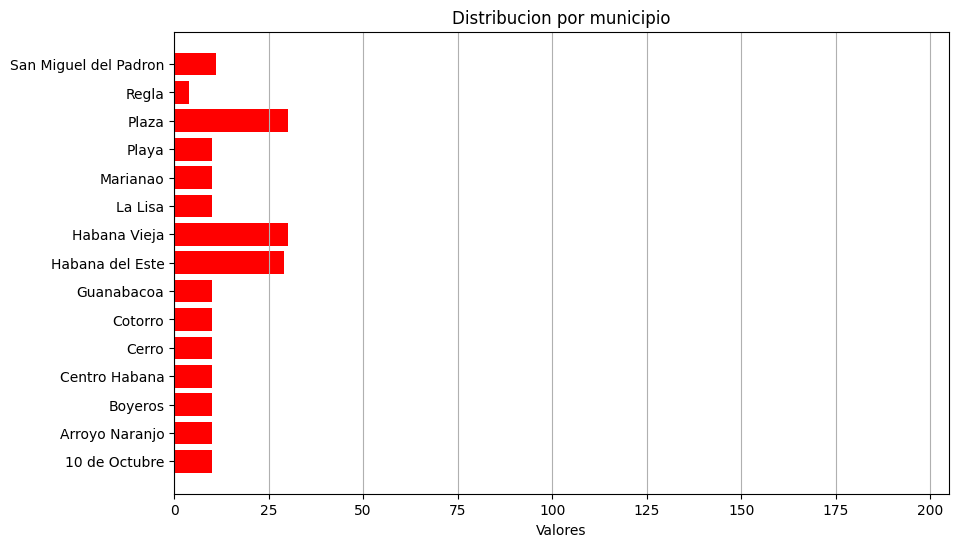

In [20]:
import os
carpeta='./Proyecto-ICD'
cantidad_restaurantes=[]

for archivo in os.listdir(carpeta) :
    ruta_completa = os.path.join(carpeta, archivo) 
    if os.path.isdir(ruta_completa):  
       cantidad_restaurantes.append([ archivo,total(ruta_completa)])
       
nombres = []
valores = []

for i in cantidad_restaurantes:
    nombres.append(i[0])
    valores.append(i[1])

plt.figure(figsize=(10, 6))
plt.barh(nombres, valores, color='red') 
plt.xlabel('Valores') 
plt.title('Distribucion por municipio') 
plt.grid(axis='x') 
plt.xlim(0, 205) 
plt.show()

A medida que Leo se interesaba más por los restaurantes, comenzó a recopilar información sobre diferentes opciones en toda La Habana. Al 
finalizar su búsqueda, había encontrado datos sobre 205 restaurantes: 11 en San Miguel del Padrón, 4 en Regla, 30 en Plaza, 10 en Playa, 10 en 
Marianao, 10 en La Lisa, 30 en Habana Vieja, 30 en Habana del Este (de este último ya había recolectado información para su cumpleaños), 10 en 
Guanabacoa, 10 en El Cotorro, 10 en El Cerro, 10 en Centro Habana, 10 en Boyeros, 10 en Arroyo Naranjo y 10 en Diez de Octubre.
Para visualizar la distribución de los restaurantes por municipio, creó un gráfico de barras

In [ ]:
a=input("Nombre del municipio: ")

df_completo,restaurantes  =  precios( os.path.join(carpeta, a))
df_minimo=df_completo.applymap(minimo)

Precio = df_minimo.apply(lambda row: row.apply(lambda x: x[0] if x is not None else 0).sum(), axis=1)
cantidad = df_minimo.apply(lambda row: row.apply(lambda x: x[1] if isinstance(x,list) and x[1] is not None else None).tolist(), axis=1)

nuevo_df = pd.DataFrame({ "Restaurants": restaurantes, "Precio minimo": Precio, "Opciones":cantidad })
nuevo_df1 = nuevo_df.sort_values(by="Precio minimo")

print(nuevo_df1)

             Restaurants  Precio minimo  \
7                    LKG            350   
3              La_Baliza            500   
5           La_Mia_Pizza            880   
8            Pacomeralgo            900   
0             Cafe_Aroma            940   
2           Juanky's_Pan            985   
4  La_Casa_del_Campesino           1048   
6               La_Novia           1720   
9     Ranchon_Don_Martin           1735   
1         Finca_La_Pinta           2500   

                                            Opciones  
7         [None, Pizza de Queso, None, Agua Mineral]  
3  [None, Pizza de Queso Blanco, None, Agua Miner...  
5  [Croquetas de Embutidos, Lasagna de Jamon, Non...  
8  [Entremes de Aceitunas, Sandwich de Queso, Non...  
0  [Nachos con Salsa, Tacos de Pollo, Bola de Hel...  
2  [Croquetas de Jamon, Hamburguesa Taquena de Ce...  
4  [Ensalada Fria, Pollo Asado, Fruta en Almibar,...  
6      [Chips de Vianda, Tacos de Cerdo, Flan, Agua]  
9     [Papas Fritas, Espaguetis

 Además, se interesó por lo que cada menú ofrecía,
ya que algunos restaurantes no tenían entrantes o postres. Por ello, elaboró una tabla que mostraba los restaurantes junto con el precio mínimo
a pagar por cada comida completa y otra columna con las opciones disponibles. De esta manera, cualquier persona interesada podría informarse 
sobre las ofertas de cada restaurante.